In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data=pd.read_csv('air quality 1.csv')
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.5+ MB


In [52]:
data.drop(columns=['station'],inplace=True)

In [53]:
from sklearn.impute import SimpleImputer as smpt

In [54]:
data.dropna(inplace=True,axis=0,subset=['PM2.5'])

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34139 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      34139 non-null  int64  
 1   year    34139 non-null  int64  
 2   month   34139 non-null  int64  
 3   day     34139 non-null  int64  
 4   hour    34139 non-null  int64  
 5   PM2.5   34139 non-null  float64
 6   PM10    34130 non-null  float64
 7   SO2     33857 non-null  float64
 8   NO2     33776 non-null  float64
 9   CO      33024 non-null  float64
 10  O3      33072 non-null  float64
 11  TEMP    34119 non-null  float64
 12  PRES    34119 non-null  float64
 13  DEWP    34119 non-null  float64
 14  RAIN    34119 non-null  float64
 15  wd      34058 non-null  object 
 16  WSPM    34125 non-null  float64
dtypes: float64(11), int64(5), object(1)
memory usage: 4.6+ MB


In [56]:
data.drop(columns=['No'],inplace=True)

In [57]:
impute=smpt(missing_values=np.nan,strategy='mean')
for i in data.drop(columns=['wd','PM2.5','year','month','day','hour']).columns:
    data[i]=impute.fit_transform(data[i].values.reshape(-1,1))


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34139 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    34139 non-null  int64  
 1   month   34139 non-null  int64  
 2   day     34139 non-null  int64  
 3   hour    34139 non-null  int64  
 4   PM2.5   34139 non-null  float64
 5   PM10    34139 non-null  float64
 6   SO2     34139 non-null  float64
 7   NO2     34139 non-null  float64
 8   CO      34139 non-null  float64
 9   O3      34139 non-null  float64
 10  TEMP    34139 non-null  float64
 11  PRES    34139 non-null  float64
 12  DEWP    34139 non-null  float64
 13  RAIN    34139 non-null  float64
 14  wd      34058 non-null  object 
 15  WSPM    34139 non-null  float64
dtypes: float64(11), int64(4), object(1)
memory usage: 4.3+ MB


In [59]:
data.dropna(axis=0,inplace=True,subset=['wd'])

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34058 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    34058 non-null  int64  
 1   month   34058 non-null  int64  
 2   day     34058 non-null  int64  
 3   hour    34058 non-null  int64  
 4   PM2.5   34058 non-null  float64
 5   PM10    34058 non-null  float64
 6   SO2     34058 non-null  float64
 7   NO2     34058 non-null  float64
 8   CO      34058 non-null  float64
 9   O3      34058 non-null  float64
 10  TEMP    34058 non-null  float64
 11  PRES    34058 non-null  float64
 12  DEWP    34058 non-null  float64
 13  RAIN    34058 non-null  float64
 14  wd      34058 non-null  object 
 15  WSPM    34058 non-null  float64
dtypes: float64(11), int64(4), object(1)
memory usage: 4.3+ MB


# Multivariate plots

In [61]:
import seaborn as sns

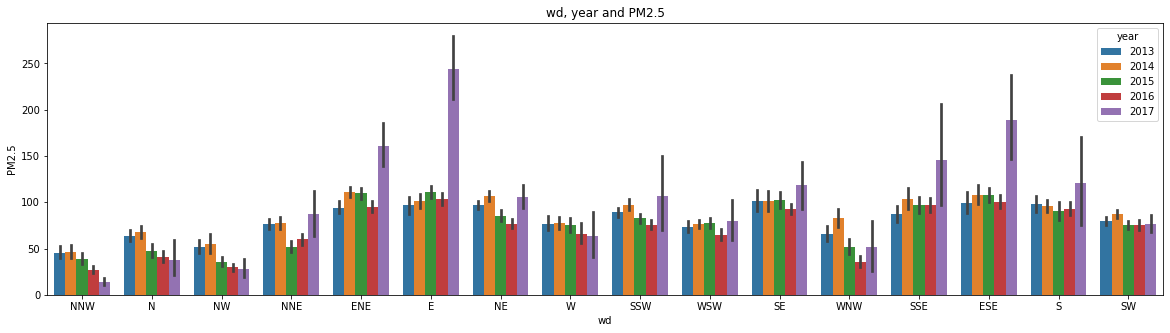

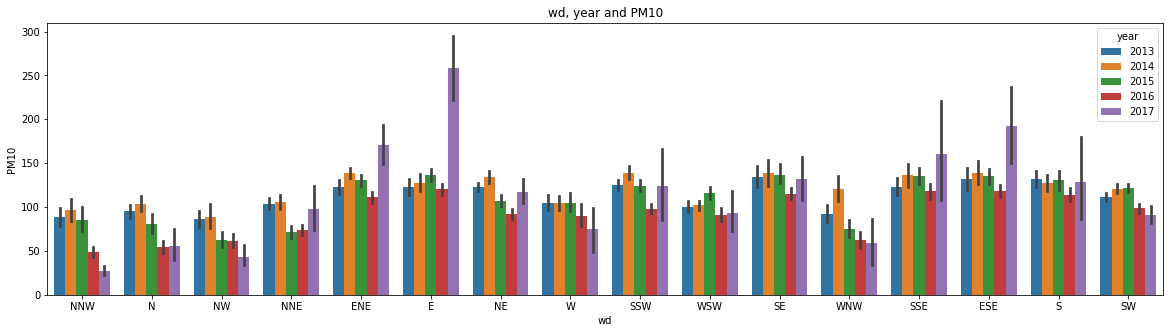

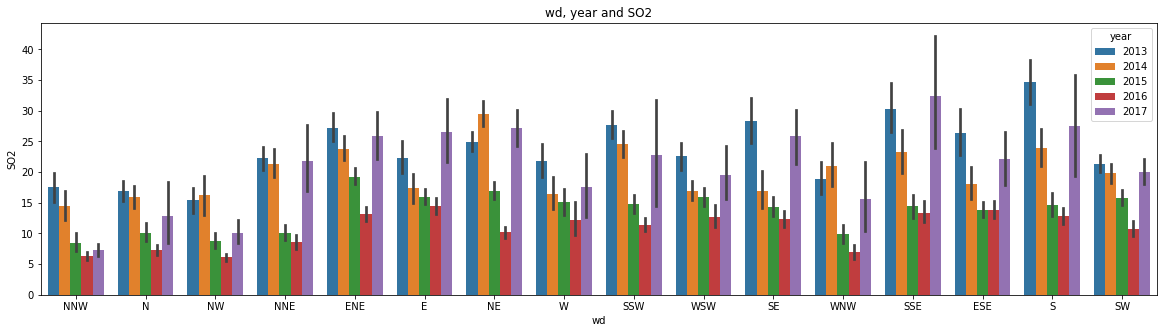

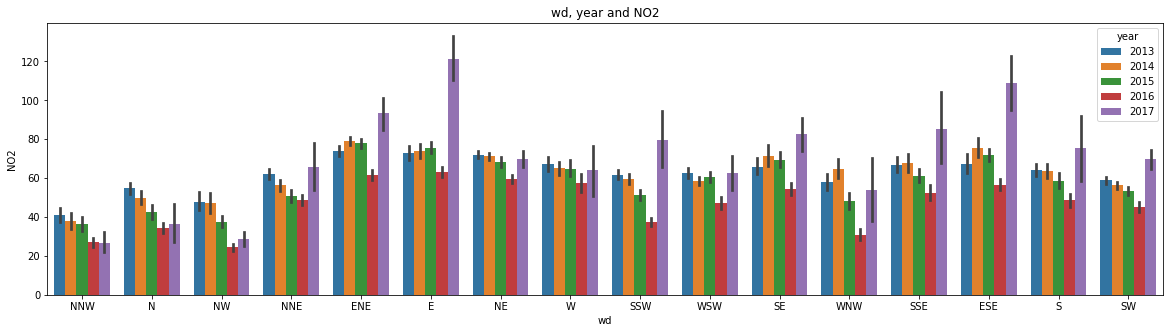

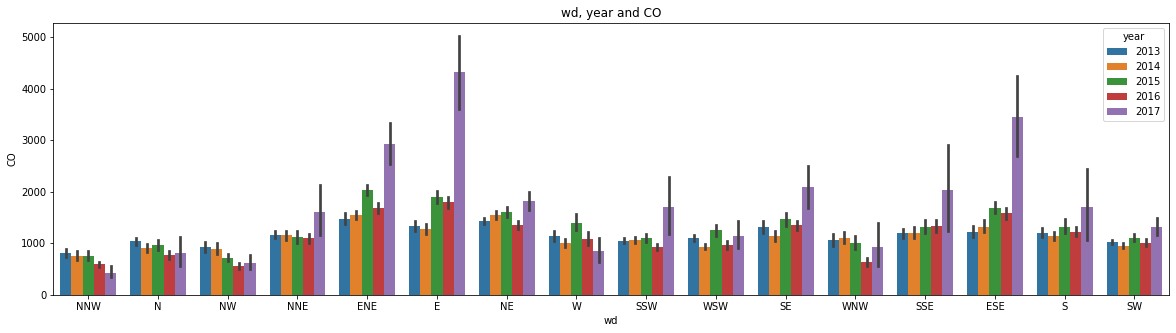

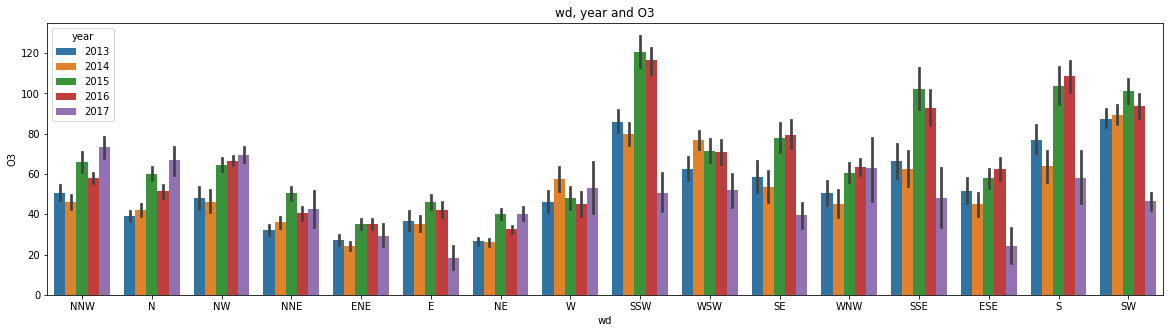

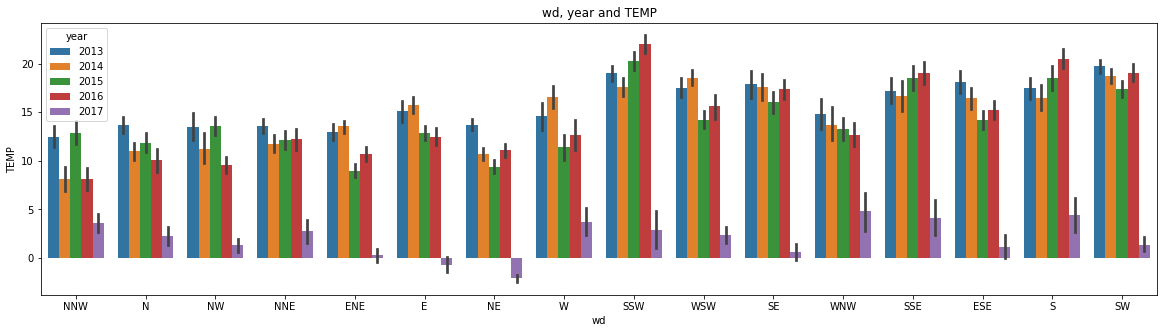

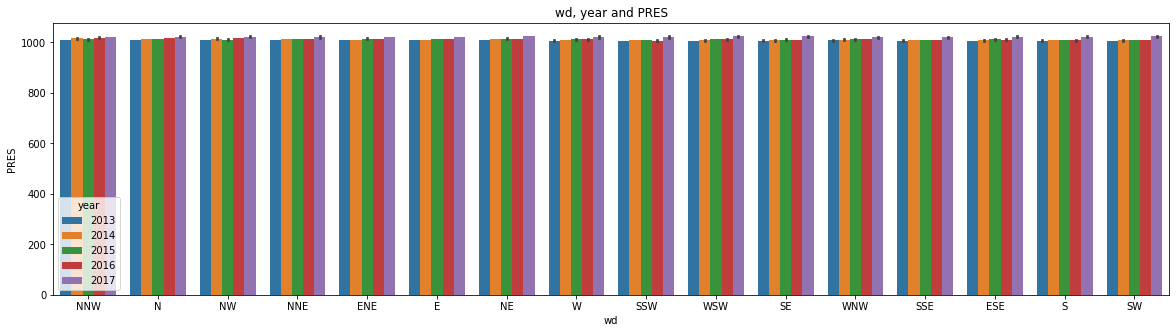

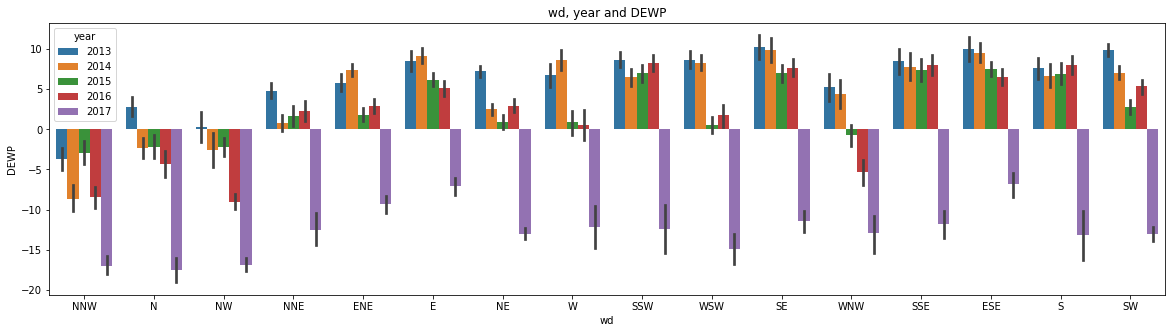

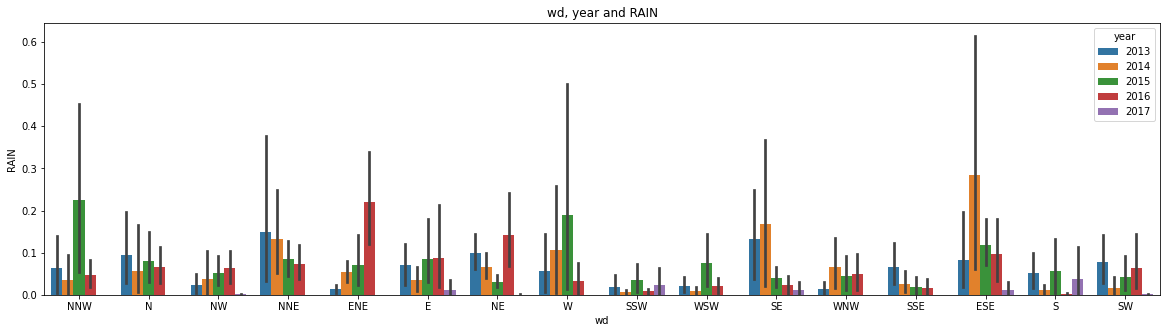

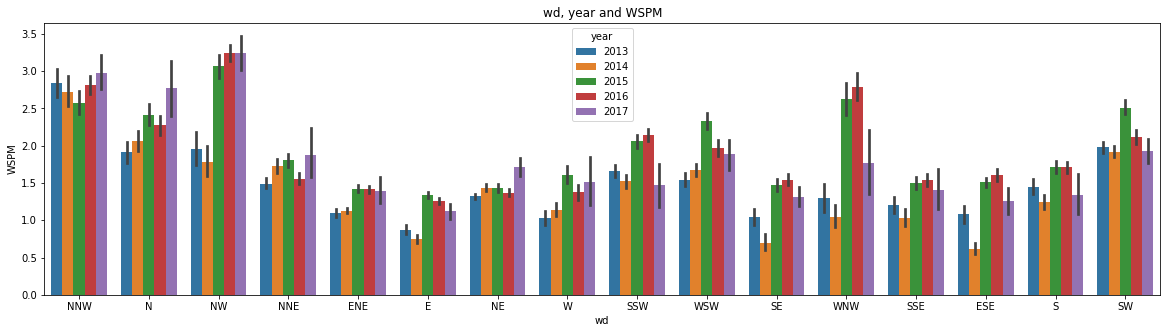

In [62]:
for i in data.drop(columns=['year','month','day','hour','wd']).columns:
    plt.figure(figsize=(20,5))
    sns.barplot(x='wd',y=i,hue='year',data=data)
    plt.title('wd, year and {}'.format(i))

# Bivariate Plots

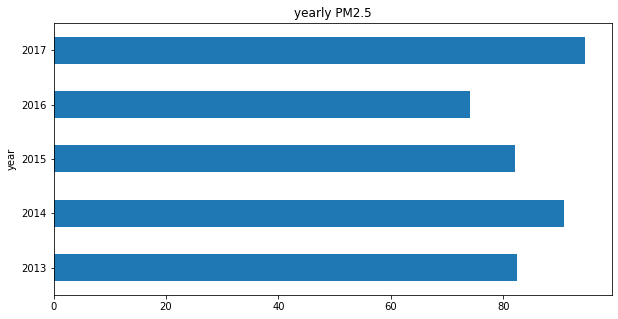

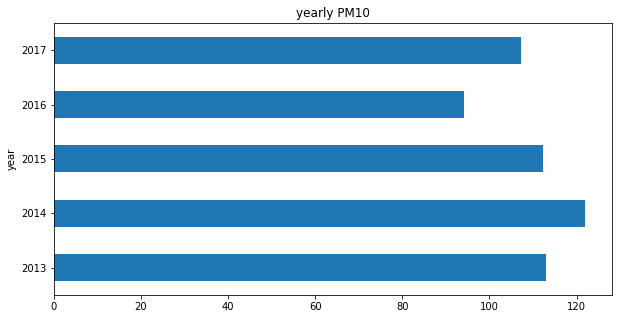

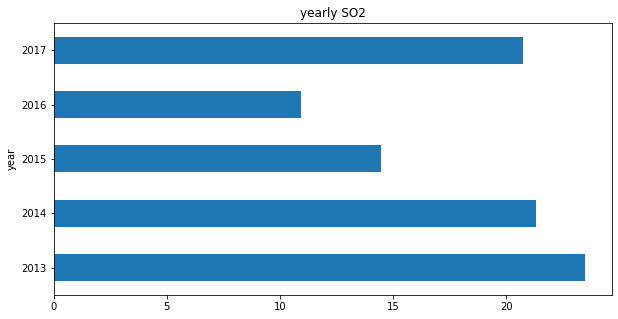

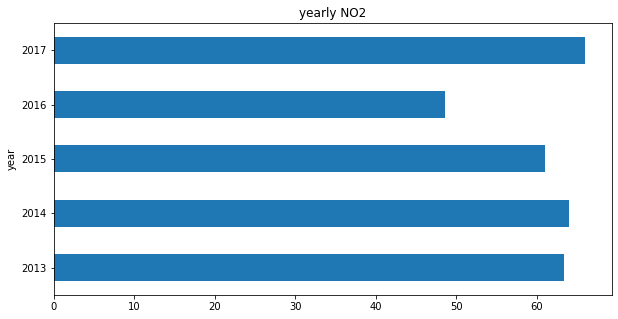

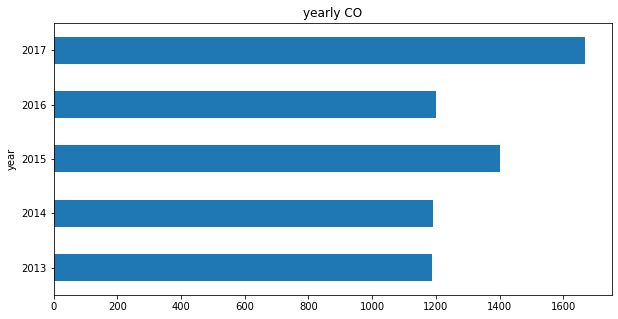

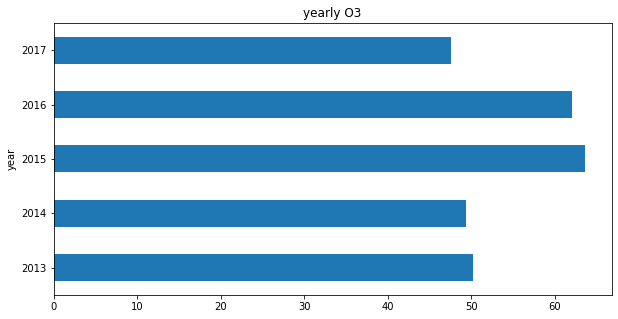

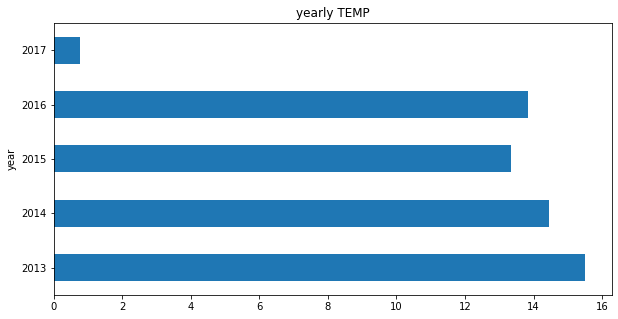

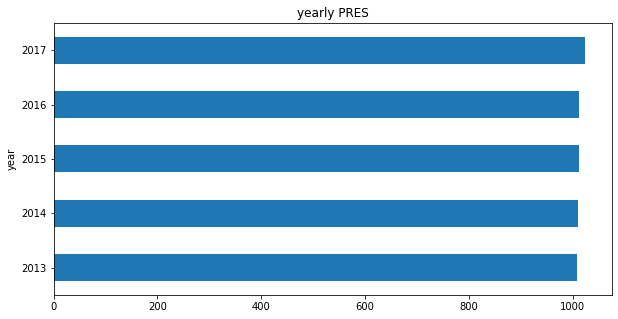

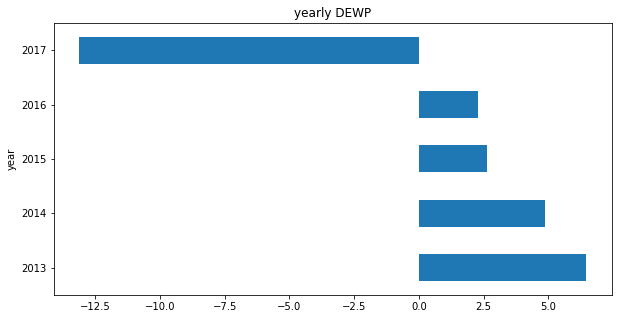

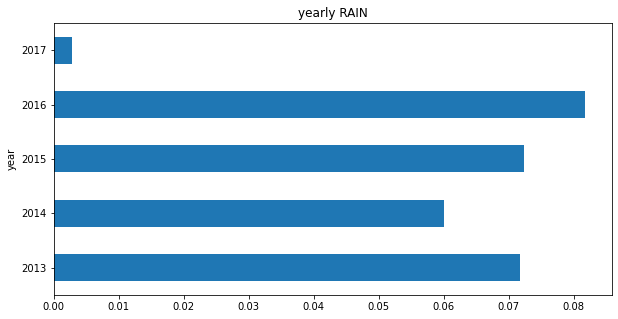

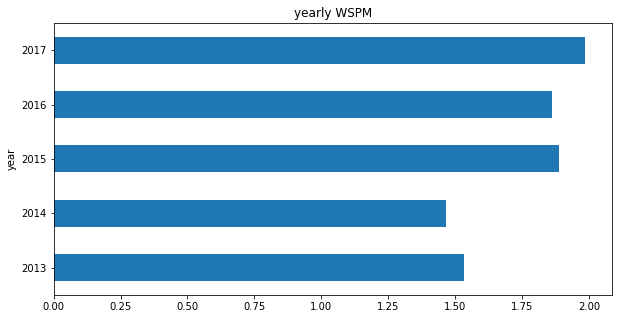

In [63]:
for i in data.drop(columns=['year','month','day','hour','wd']).columns:
    plt.figure(figsize=(10,5))
    data.groupby('year')[i].mean().plot(kind='barh')
    plt.title('yearly {}'.format(i))

In [64]:
data['month']=data['month'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34058 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    34058 non-null  int64  
 1   month   34058 non-null  object 
 2   day     34058 non-null  int64  
 3   hour    34058 non-null  int64  
 4   PM2.5   34058 non-null  float64
 5   PM10    34058 non-null  float64
 6   SO2     34058 non-null  float64
 7   NO2     34058 non-null  float64
 8   CO      34058 non-null  float64
 9   O3      34058 non-null  float64
 10  TEMP    34058 non-null  float64
 11  PRES    34058 non-null  float64
 12  DEWP    34058 non-null  float64
 13  RAIN    34058 non-null  float64
 14  wd      34058 non-null  object 
 15  WSPM    34058 non-null  float64
dtypes: float64(11), int64(3), object(2)
memory usage: 4.9+ MB


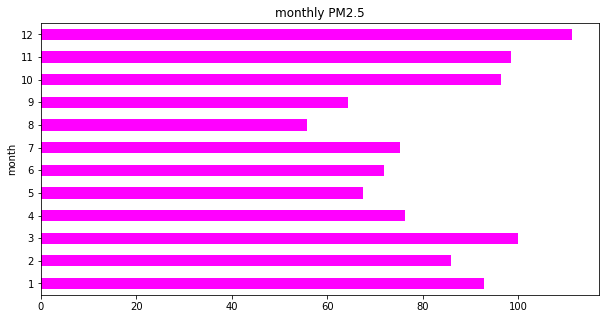

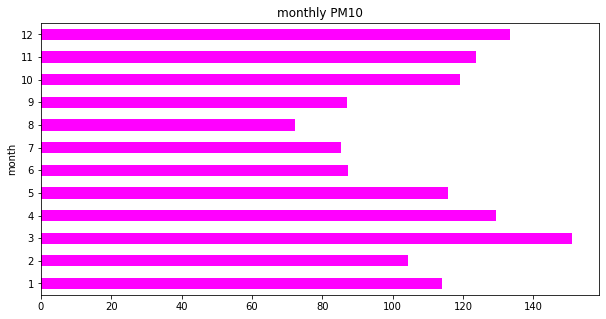

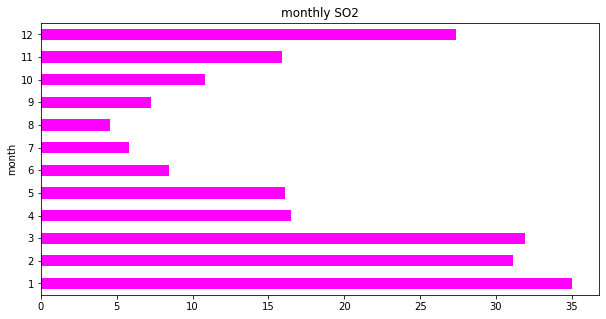

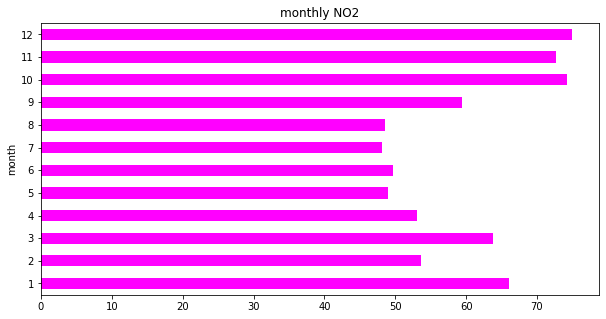

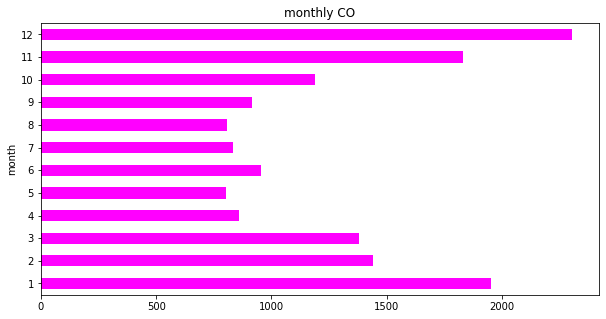

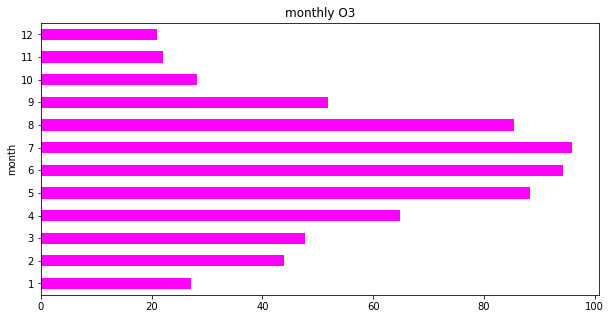

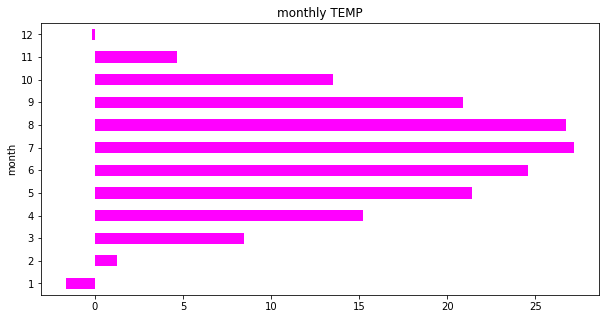

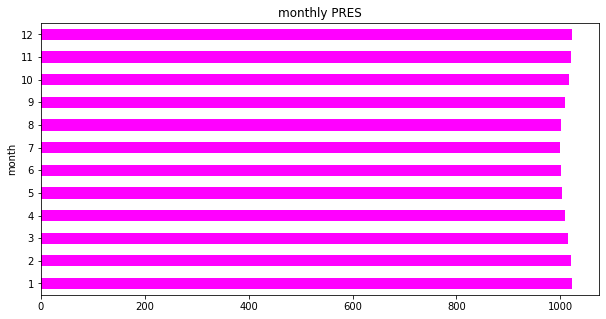

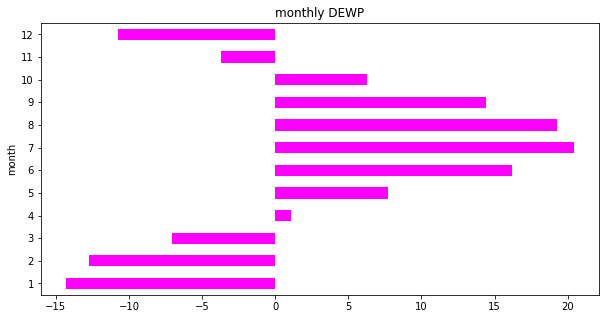

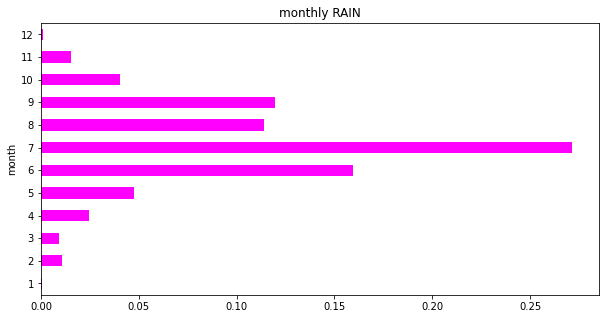

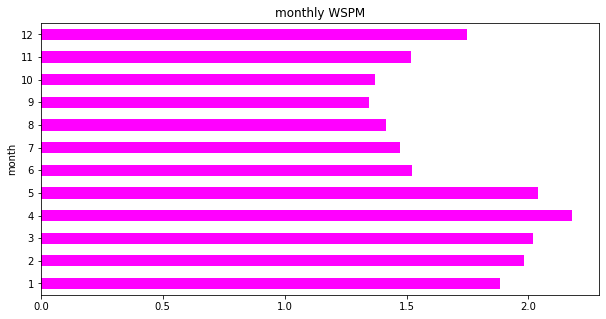

In [65]:
for i in data.drop(columns=['year','month','day','hour','wd']).columns:
    plt.figure(figsize=(10,5))
    data.groupby('month')[i].mean().plot(kind='barh',color='magenta')
    plt.title('monthly {}'.format(i))


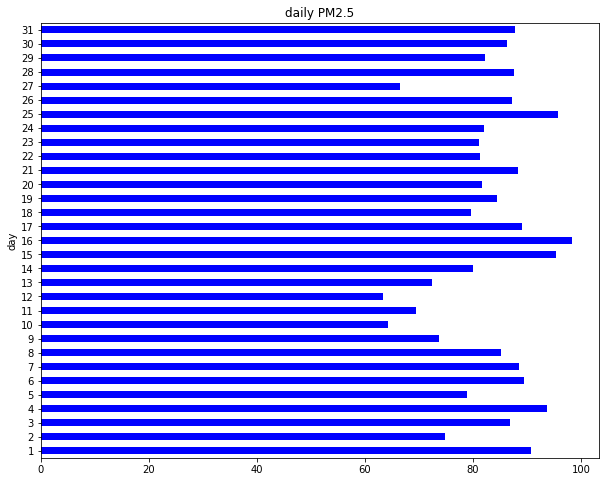

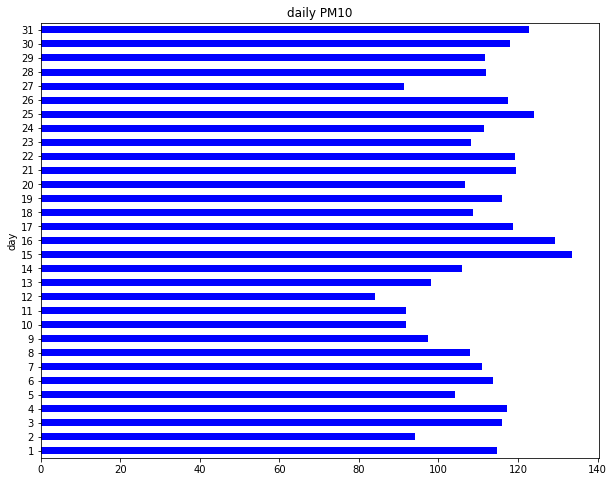

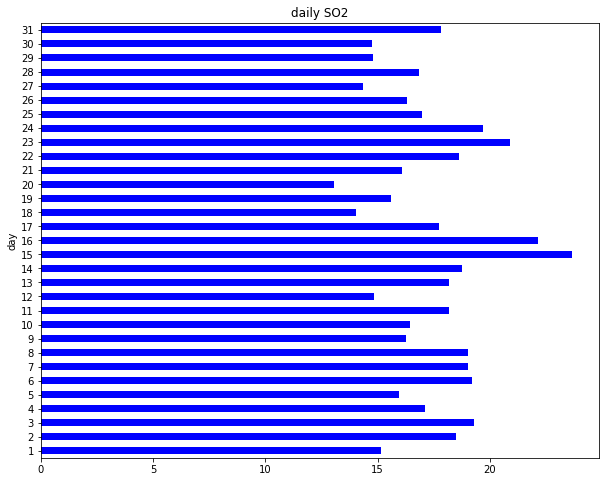

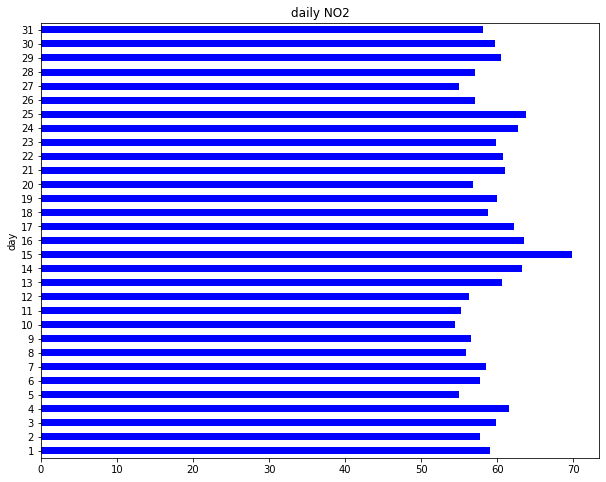

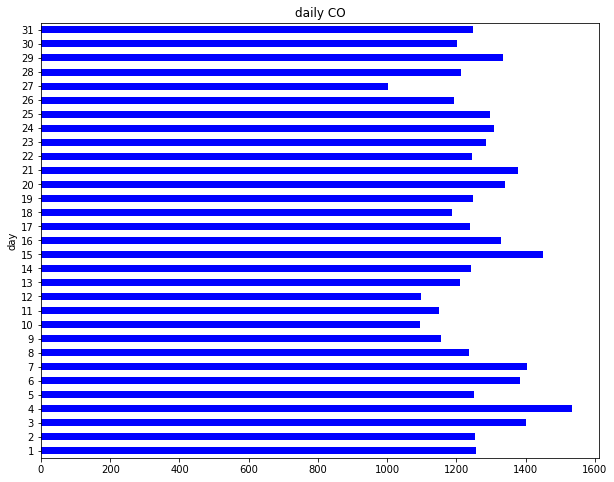

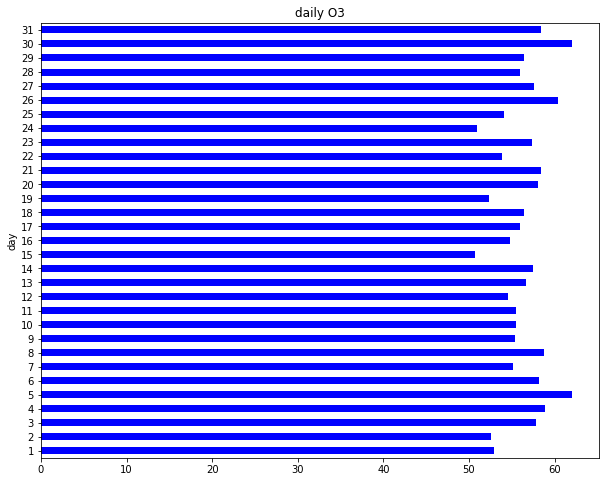

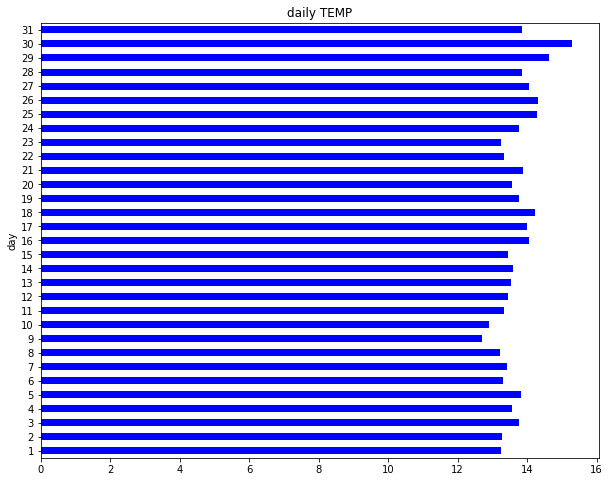

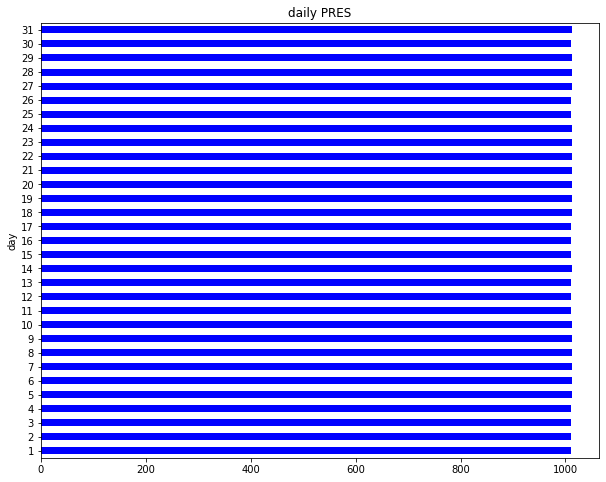

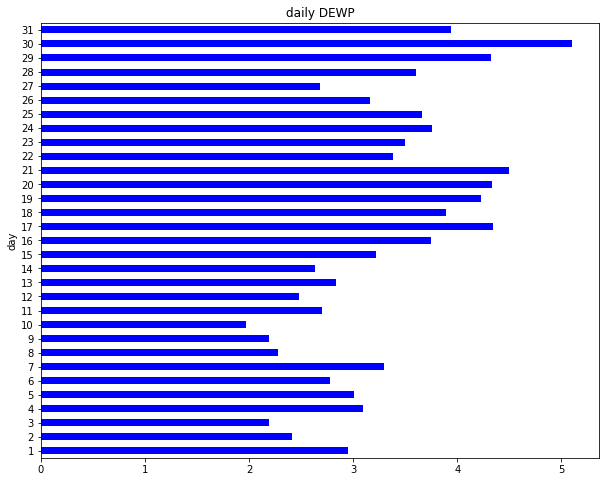

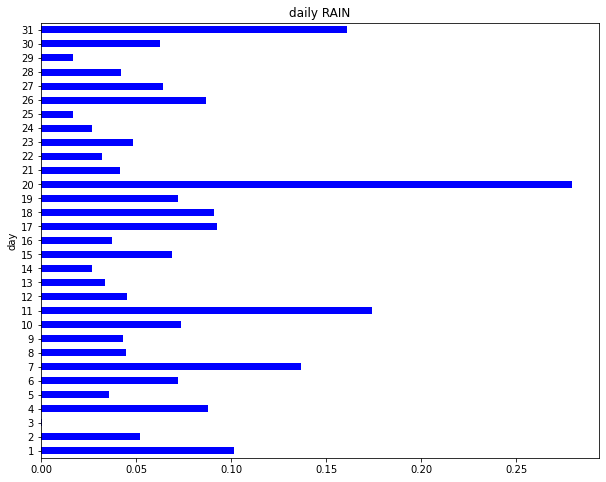

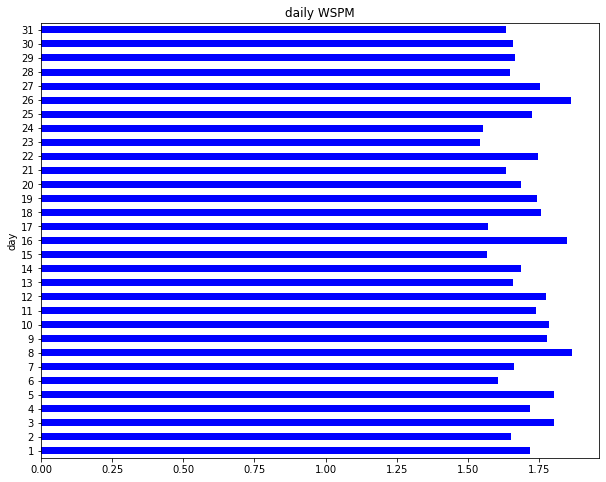

In [66]:
for i in data.drop(columns=['year','month','day','hour','wd']).columns:
    plt.figure(figsize=(10,8))
    data.groupby('day')[i].mean().plot(kind='barh',color='blue')
    plt.title('daily {}'.format(i))

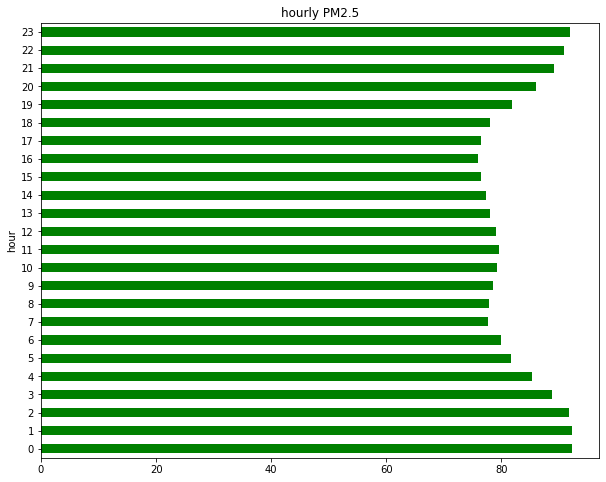

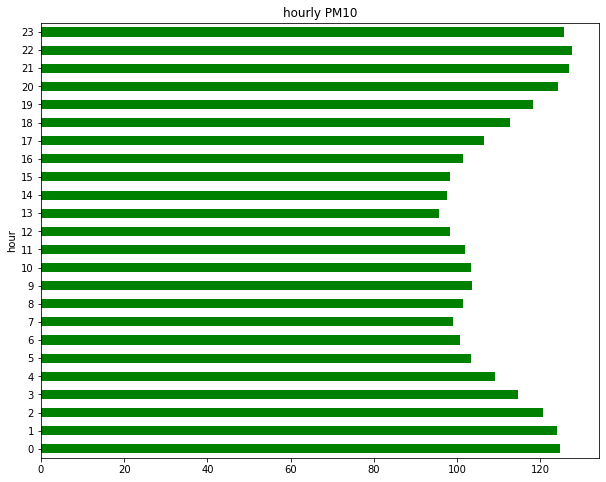

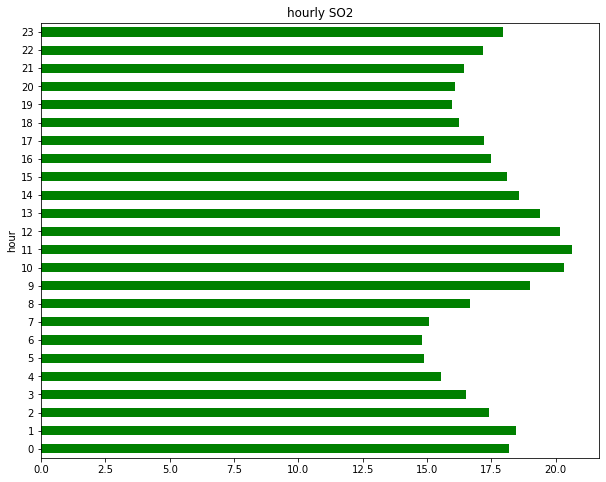

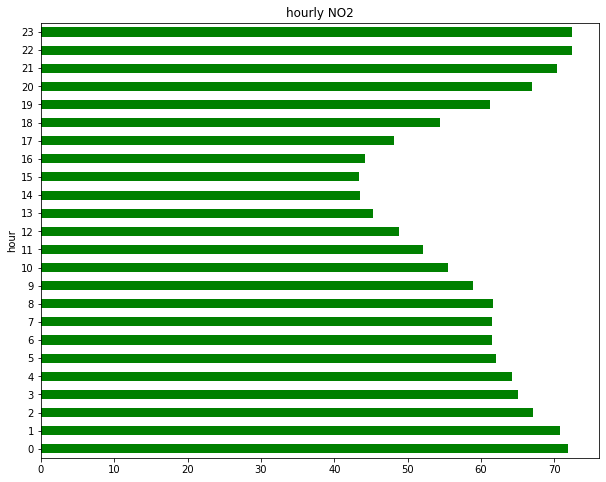

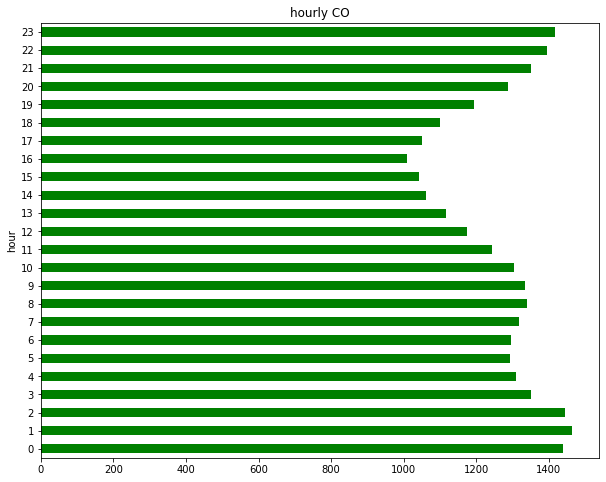

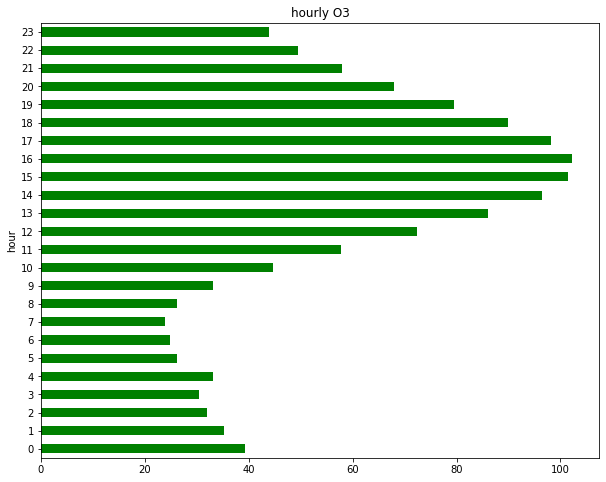

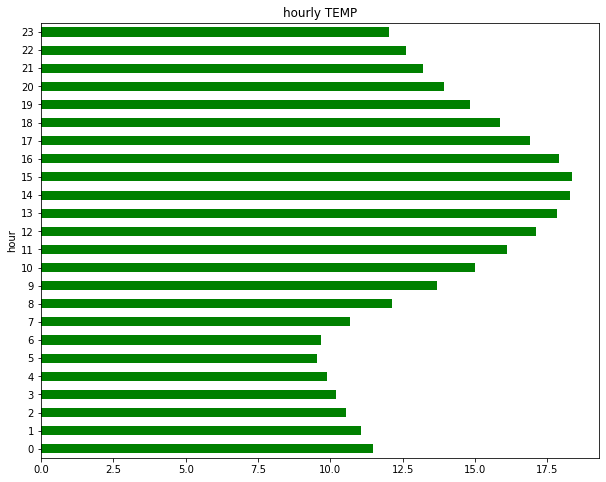

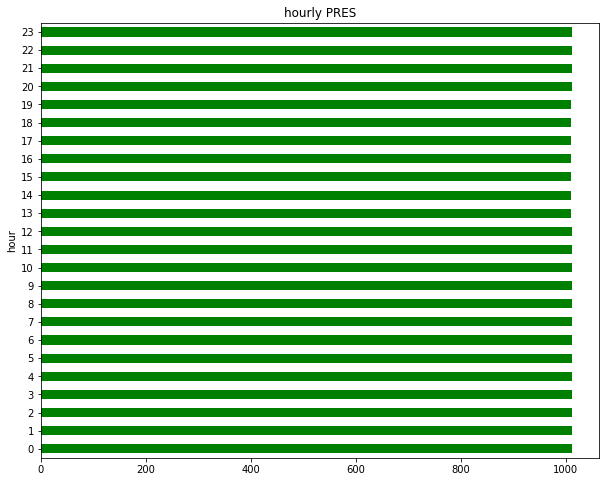

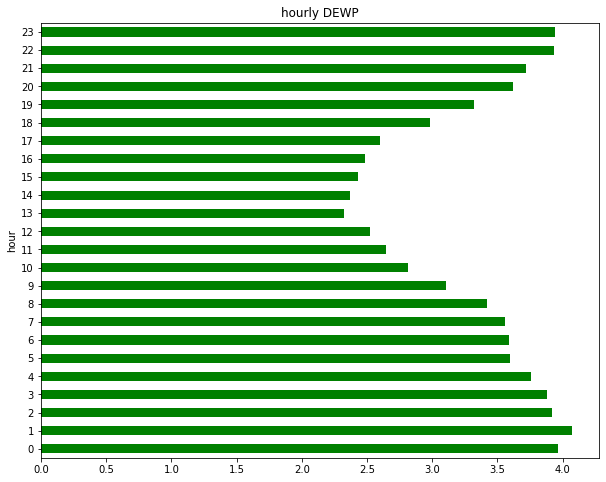

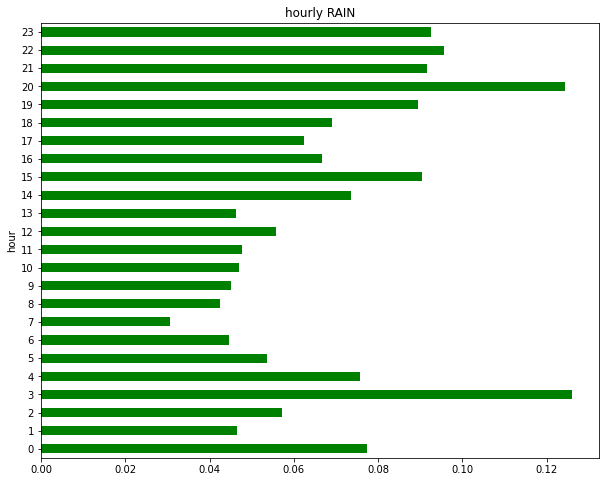

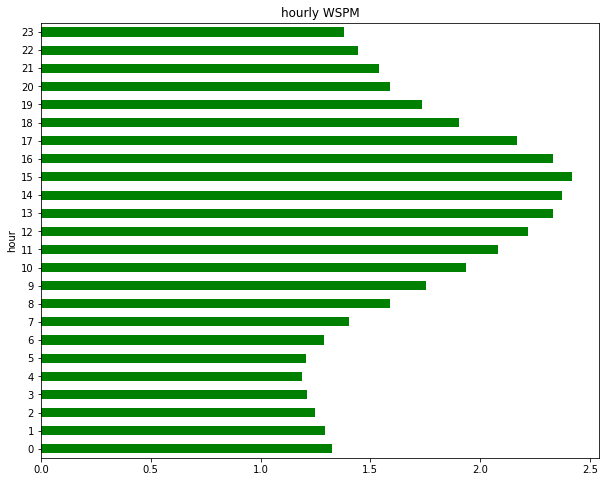

In [67]:
for i in data.drop(columns=['year','month','day','hour','wd']).columns:
    plt.figure(figsize=(10,8))
    data.groupby('hour')[i].mean().plot(kind='barh',color='green')
    plt.title('hourly {}'.format(i))

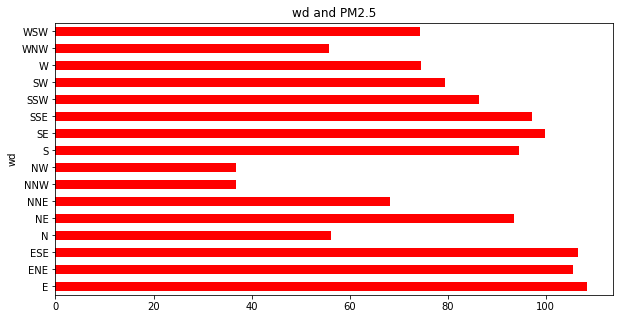

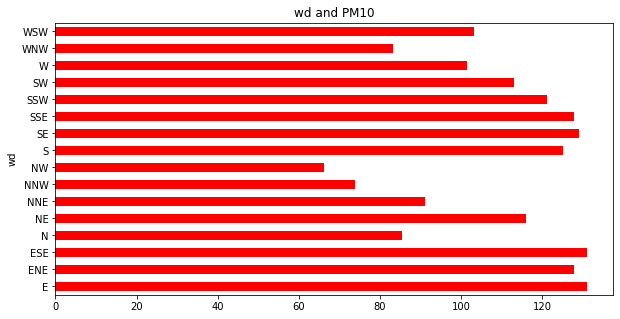

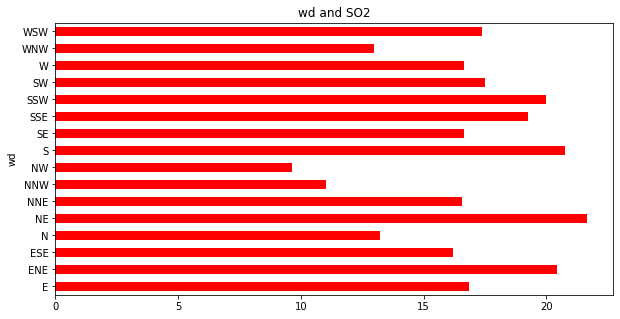

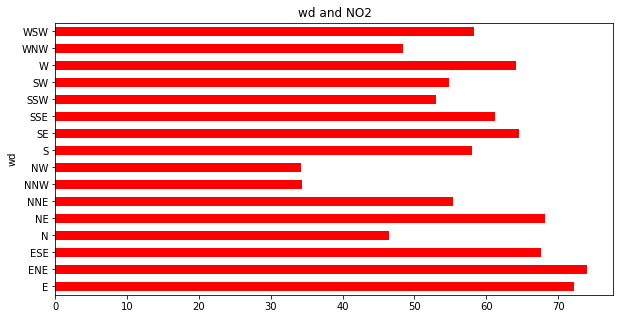

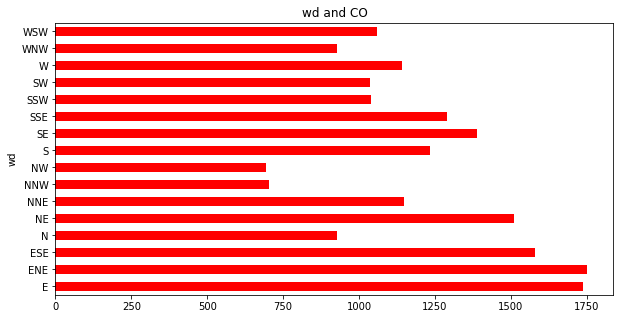

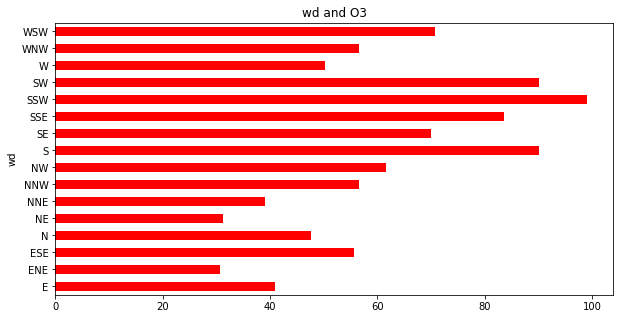

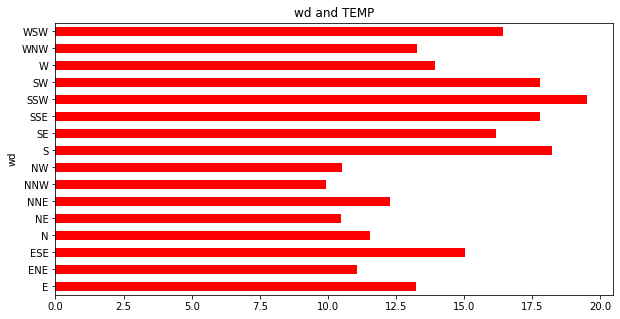

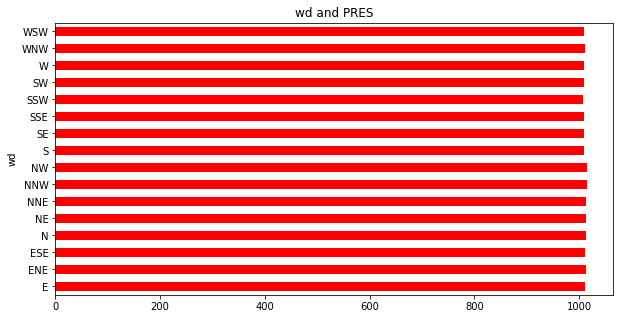

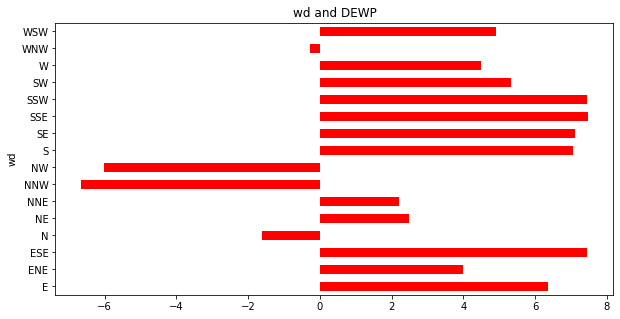

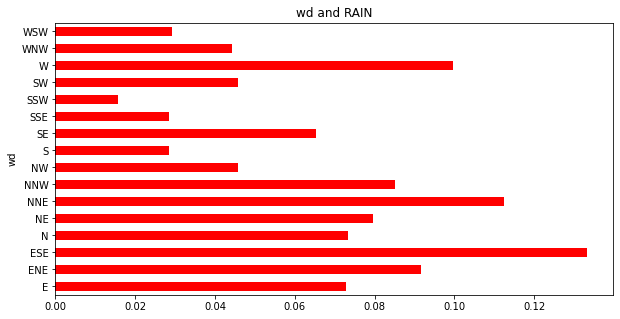

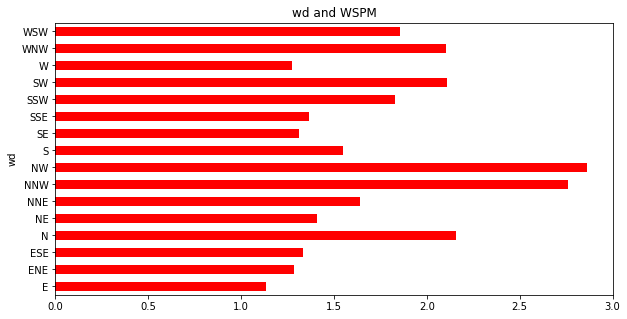

In [68]:
for i in data.drop(columns=['year','month','day','hour','wd']).columns:
    plt.figure(figsize=(10,5))
    data.groupby('wd')[i].mean().plot(kind='barh',color='red')
    plt.title('wd and {}'.format(i))

# distplot

C:\Users\User\Python39-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Python39-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Python39-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

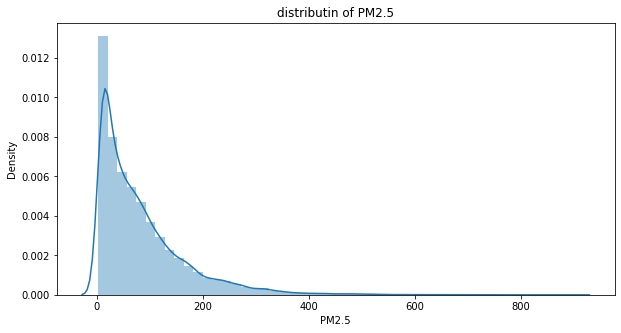

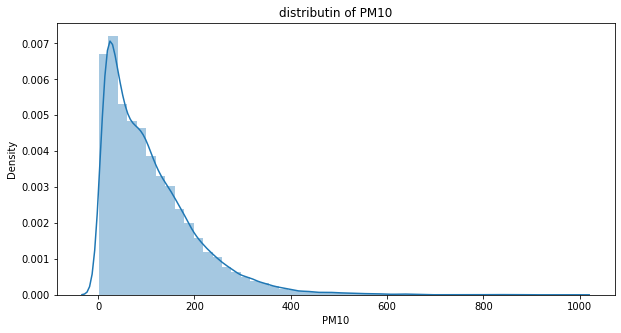

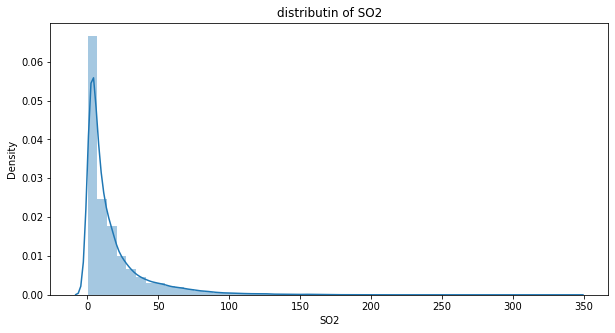

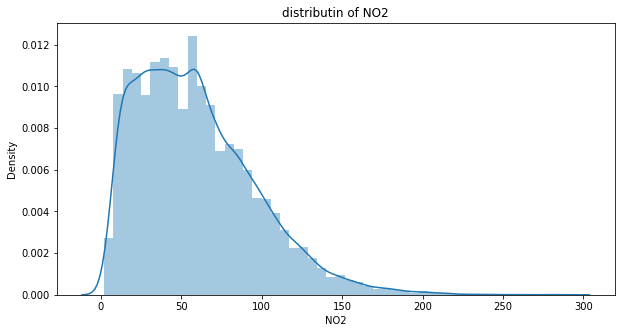

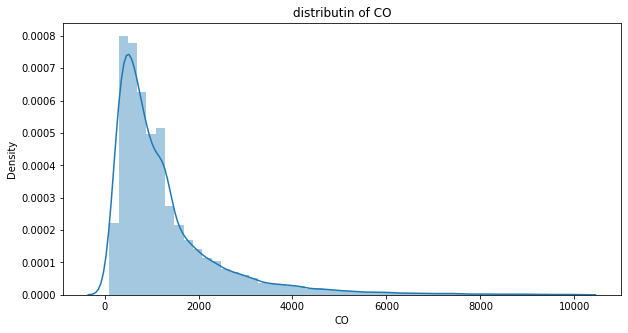

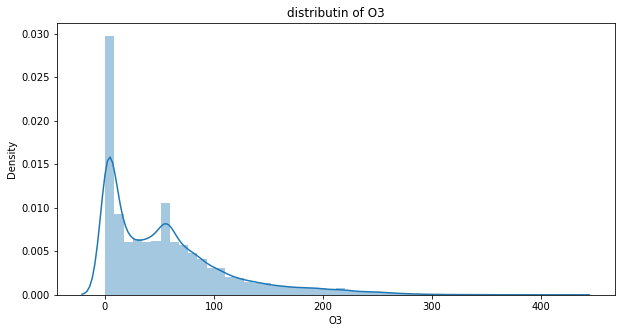

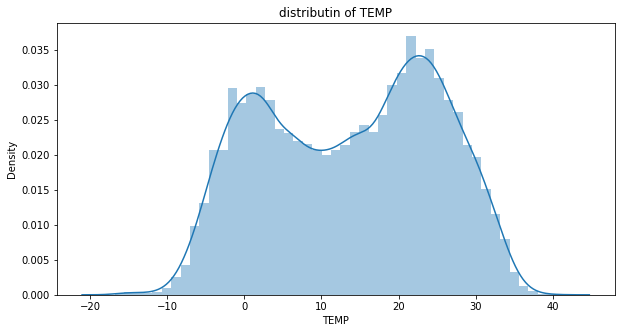

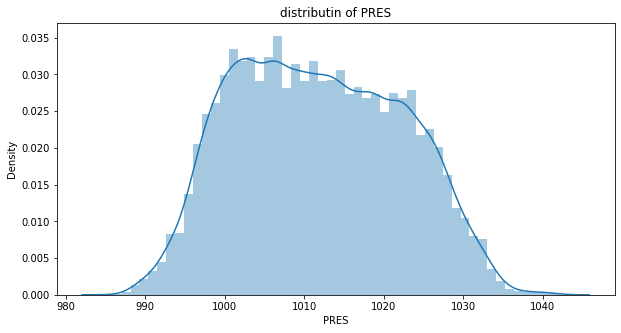

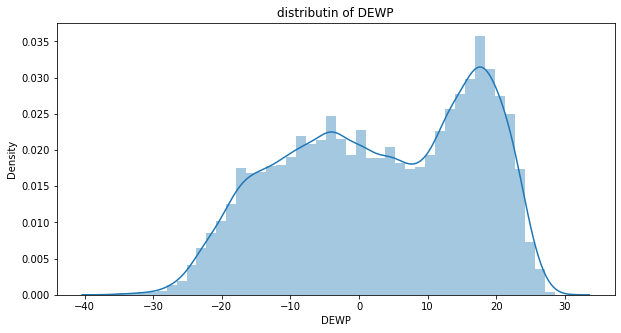

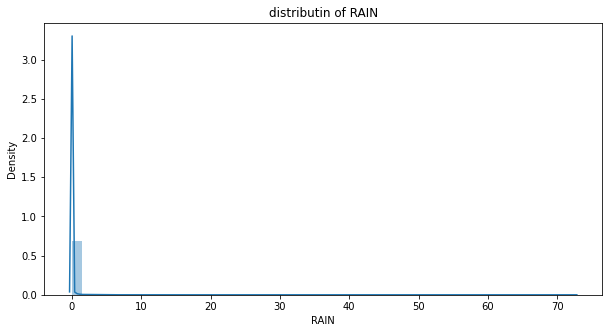

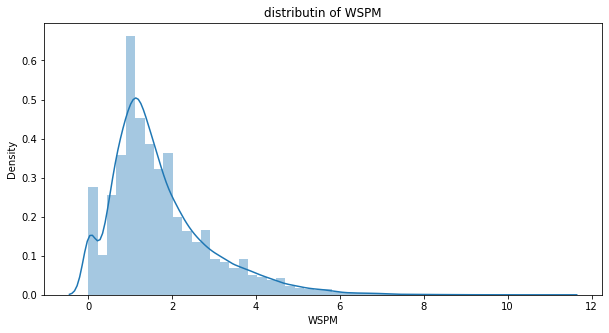

In [69]:
for i in data.drop(columns=['year','month','day','hour','wd']).columns:
    plt.figure(figsize=(10,5))
    sns.distplot(data[i])
    plt.title('distributin of {}'.format(i))

# Boxplot

C:\Users\User\Python39-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\Python39-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\Python39-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\Python39-32\li

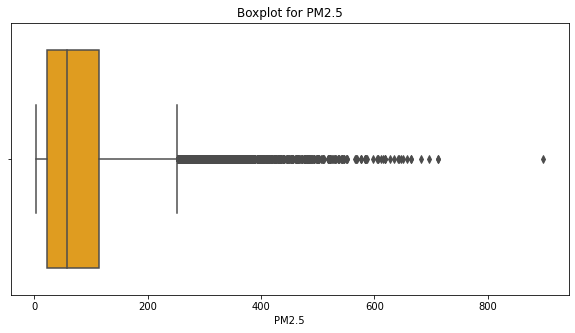

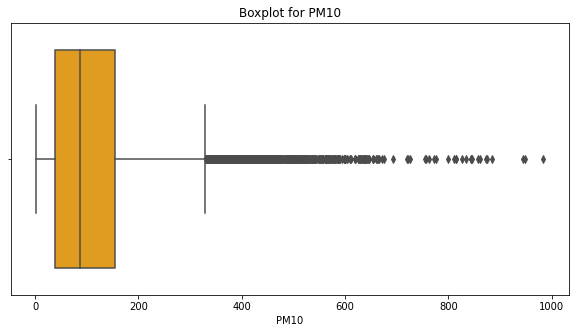

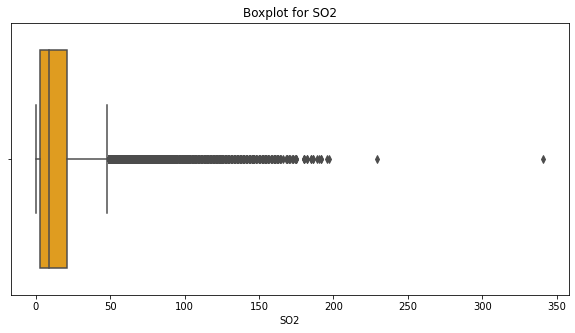

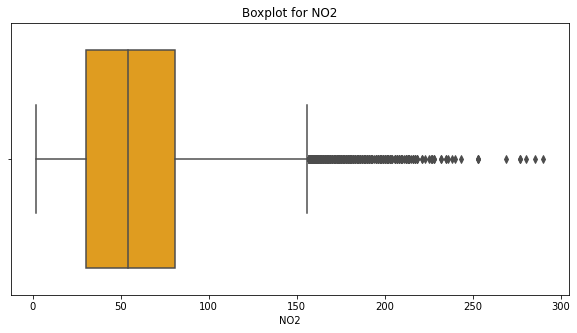

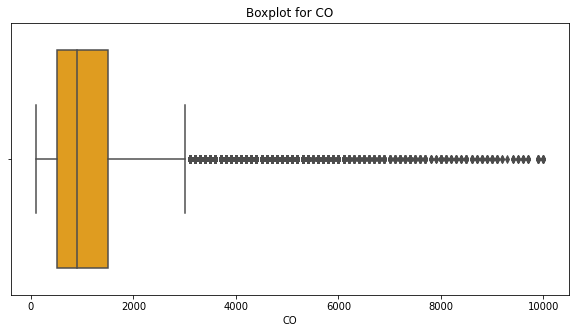

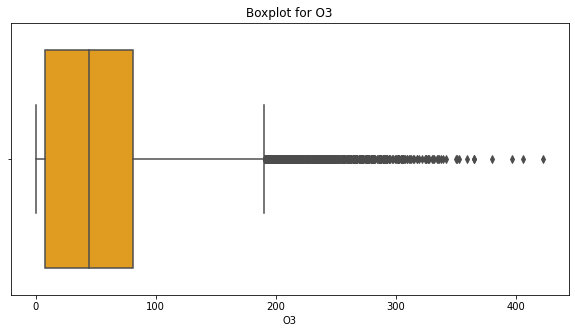

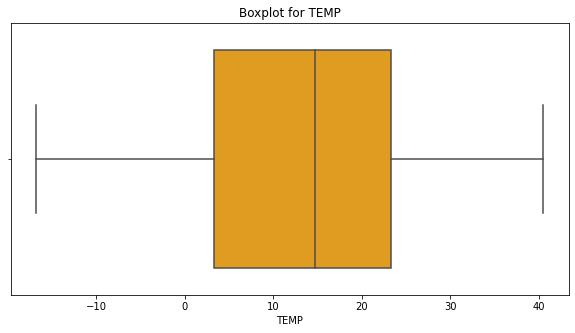

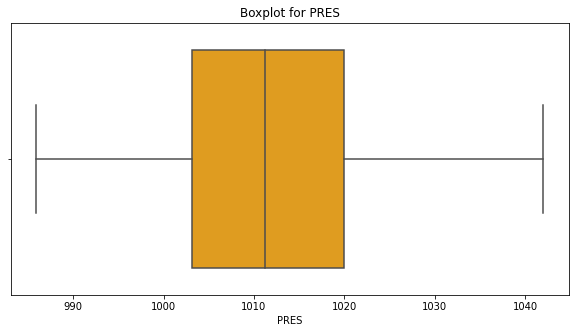

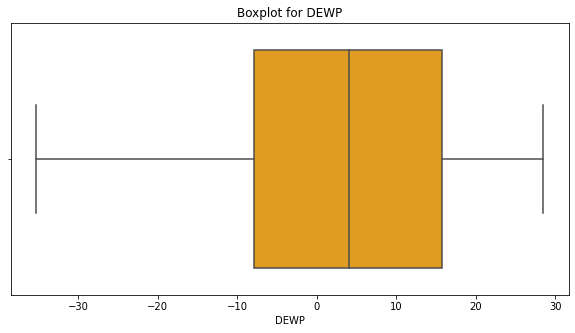

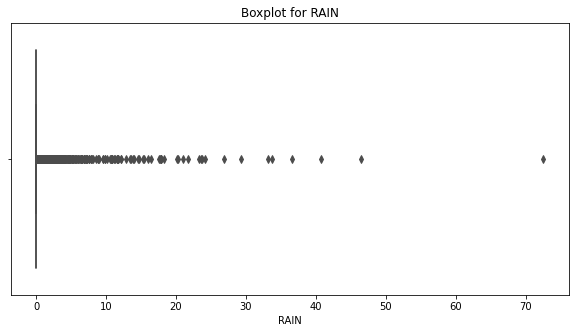

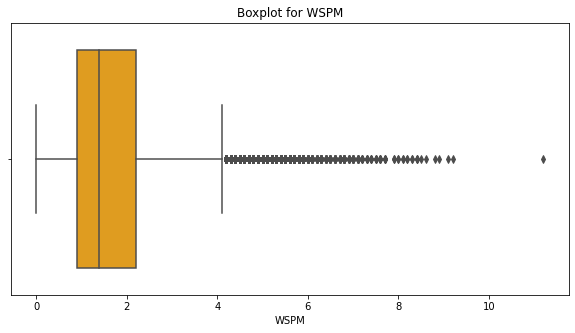

In [70]:
for i in data.drop(columns=['year','month','day','hour','wd']).columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(data[i],color='orange')
    plt.title('Boxplot for {}'.format(i))

In [71]:
def level(value):
    if value>=0 and value<=50:
        return 'Good'
    elif value>=51 and value<=100:
        return 'Moderate'
    elif value>=101 and value<=150:
        return 'unhealthy'
    else:
        return 'Hazarduous'

In [72]:
data['PM2.5']=data['PM2.5'].apply(level)

In [73]:
data['PM2.5'].value_counts()

Good          15513
Moderate       8456
Hazarduous     5508
unhealthy      4581
Name: PM2.5, dtype: int64

# Training the data

In [74]:
from sklearn.model_selection import train_test_split as tst

In [75]:
from sklearn.preprocessing import StandardScaler as sc
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
x=data.drop(columns=['year','month','day','hour','wd','PM2.5'])
y=data['PM2.5']

In [77]:
x_train,x_test,y_train,y_test=tst(x,y,test_size=0.3,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((23840, 10), (10218, 10), (23840,), (10218,))

In [78]:
std=sc()
x_train=std.fit_transform(x_train)
x_test=std.fit_transform(x_test)

# Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression as lrg

In [80]:
lr=lrg()

In [81]:
lr.fit(x_train,y_train)

LogisticRegression()

In [82]:
lr.score(x_train,y_train)


0.7622063758389261

In [83]:
lr.score(x_test,y_test)

0.7590526521824231

# Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [85]:
dt=dtc()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [86]:
dt.score(x_train,y_train)

1.0

In [87]:
dt.score(x_test,y_test)

0.7889019377568995

# SVM

In [88]:
from sklearn.svm import SVC 

In [89]:
sc=SVC()
sc.fit(x_train,y_train)

SVC()

In [90]:
training_accuracy=sc.score(x_train,y_train)

In [91]:
testing_accuracy=sc.score(x_test,y_test)

In [92]:
print("training accuracy is ",training_accuracy)
print("testing accuracy is",testing_accuracy)

training accuracy is  0.8173657718120806
testing accuracy is 0.8138578978273635


Text(0.5, 1.0, 'Visualization important featureas')

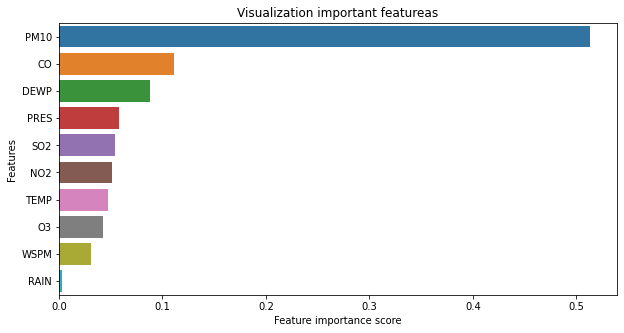

In [93]:
importance=dt.feature_importances_
feature_imp=pd.Series(importance,index=data.drop(columns=['wd','PM2.5','year','month','day','hour']).columns).sort_values(ascending=False)
feature_imp
plt.figure(figsize=(10,5))
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature importance score')
plt.ylabel('Features')
plt.title('Visualization important featureas')